In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans, AgglomerativeClustering
import numpy as np
from silhouette import make_figure, make_silhouette

In [2]:
n_clusters = 5
data, cluster_labels = make_blobs(n_samples=500, n_features=2000, centers=n_clusters, center_box=(-10.0, 10.0), cluster_std=[1,1,4,1,1], random_state=42)
data = data + np.abs(np.min(data))

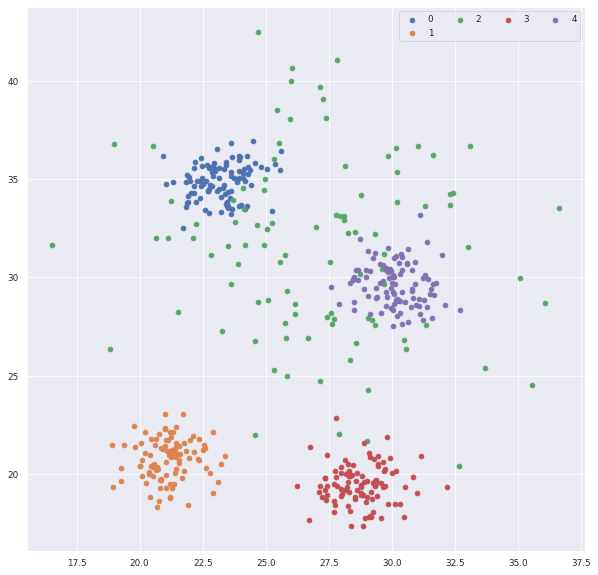

In [3]:
make_figure(data, cluster_labels)

In [ ]:
metrics = ['euclidean', 'correlation', 'cosine']

In [ ]:
make_silhouette(cluster_labels)

In [ ]:
model = KMeans(n_clusters=n_clusters, n_init=1000)

In [ ]:
out = model.fit_predict(data)

In [ ]:
make_figure(out)

In [ ]:
make_silhouette(out)

In [ ]:
model=AgglomerativeClustering(n_clusters=5, linkage='average')

In [ ]:
hierout = model.fit_predict(data)

In [ ]:
make_figure(hierout)

In [ ]:
make_silhouette(hierout)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
lda = LatentDirichletAllocation(n_components=10, random_state=42)

In [ ]:
ldaout = np.argmax(lda.fit_transform(data), axis=1)

In [ ]:
make_figure(ldaout)

In [ ]:
make_silhouette(ldaout)

# Null model from data

In [14]:
import pandas as pd
import cloudpickle as pickle

In [5]:
df = pd.read_csv("../topics/datasets/gtex10/mainTable.csv", index_col=0)
df_files = pd.read_csv("../topics/datasets/gtex10/files.dat").set_index("SAMPID")

In [32]:
df_tissue_gb = df.transpose().applymap(lambda tpm: np.log2(tpm+1)).join(df_files.loc[:,"SMTS"]).groupby("SMTS")
means = df_tissue_gb.median().values
stds = df_tissue_gb.std().values

In [33]:
n_clusters = df_tissue.shape[0]
data, cluster_labels = make_blobs(n_samples=df.shape[1], n_features=df_tissue.shape[1], centers=means, cluster_std=stds, random_state=42)

In [34]:
assert(data.T.shape==df.shape)

In [35]:
with open("figs.pkl", "rb") as file:
    figs = pickle.load(file)

In [32]:
def orange_color():
    while True:
        yield "orange"
        
orange_itarator = orange_color()

In [37]:
make_silhouette(data,
                "SMTS+null", 
                df_tissue.index, 
                cluster_labels, 
                cluster_labels.max()+1, 
                metrics = ["euclidean", "cosine", "correlation"],
                color_iterator=orange_itarator, 
                figs=figs
               )

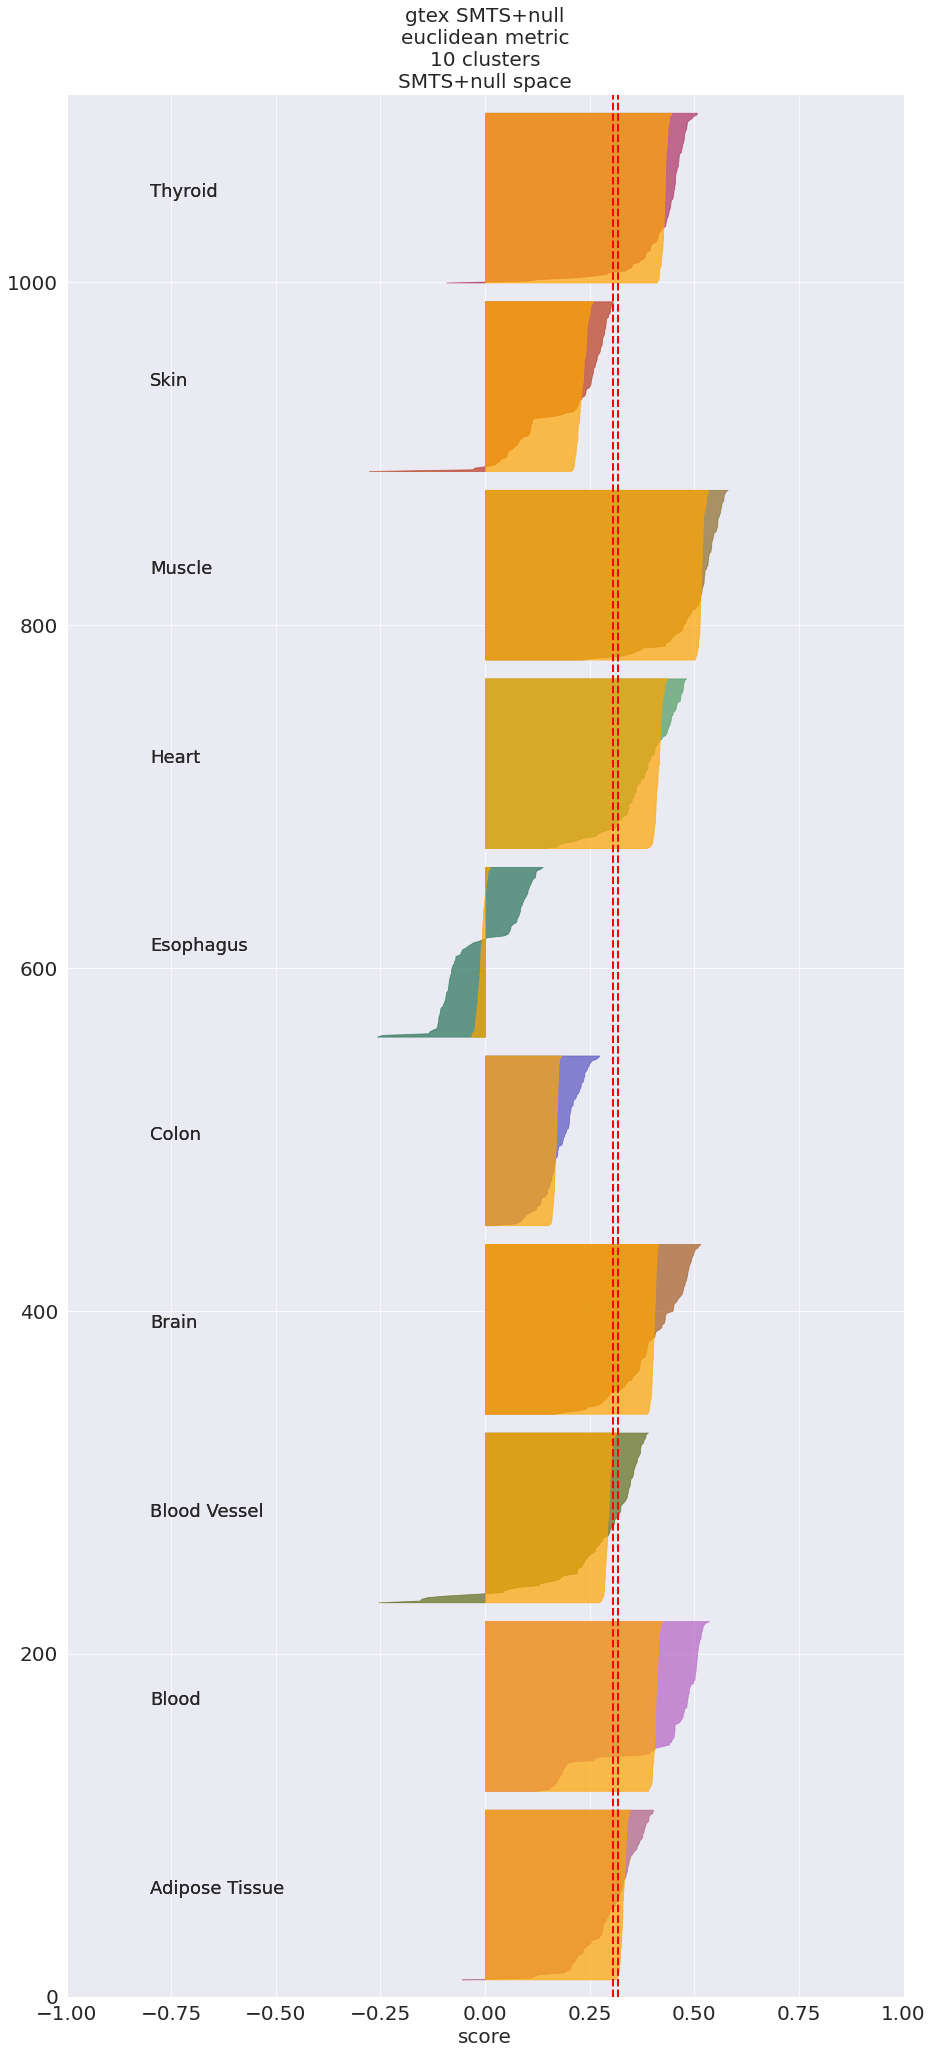

In [38]:
figs[0]

# Compare with MNIST

In [4]:
from tensorflow.keras.datasets import mnist

In [51]:
(x_train, y_train), (_, _) = mnist.load_data()

In [53]:
x_train = np.concatenate([x_train[y_train==0][:100],
                x_train[y_train==1][:100],
                x_train[y_train==2][:100],
                x_train[y_train==3][:100],
                x_train[y_train==4][:100],
                x_train[y_train==5][:100],
                x_train[y_train==6][:100],
                x_train[y_train==7][:100],
                x_train[y_train==8][:100],
                x_train[y_train==9][:100]
               ]).reshape((1000,-1))

y_train = np.concatenate([y_train[y_train==0][:100],
                y_train[y_train==1][:100],
                y_train[y_train==2][:100],
                y_train[y_train==3][:100],
                y_train[y_train==4][:100],
                y_train[y_train==5][:100],
                y_train[y_train==6][:100],
                y_train[y_train==7][:100],
                y_train[y_train==8][:100],
                y_train[y_train==9][:100]
               ])

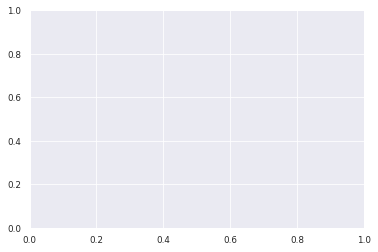

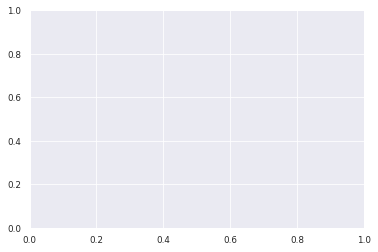

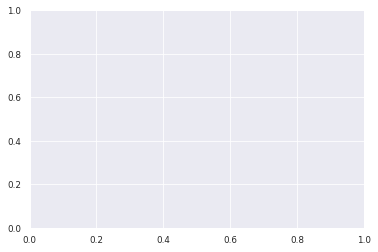

In [54]:
figs = [plt.subplots()[0] for _ in range(3)]

In [55]:
make_silhouette(x_train,
                "mnist", 
                np.unique(y_train), 
                y_train, 
                10, 
                metrics = ["euclidean", "cosine", "correlation"],
                figs=figs)

In [56]:
df_mnist = pd.DataFrame(data=x_train)
df_mnist["label"]=y_train
df_mnist_gb = df_mnist.groupby("label")
means = df_mnist_gb.median()
stds = df_mnist_gb.std()

In [57]:
stds.shape

(10, 784)

In [58]:
data, cluster_labels = make_blobs(n_samples=x_train.shape[0], n_features=x_train.shape[1], centers=means, cluster_std=stds, random_state=42)

In [59]:
make_silhouette(data,
                "mnist+null", 
                np.unique(y_train), 
                cluster_labels, 
                10, 
                color_iterator=orange_itarator,
                metrics = ["euclidean", "cosine", "correlation"],
                figs=figs)

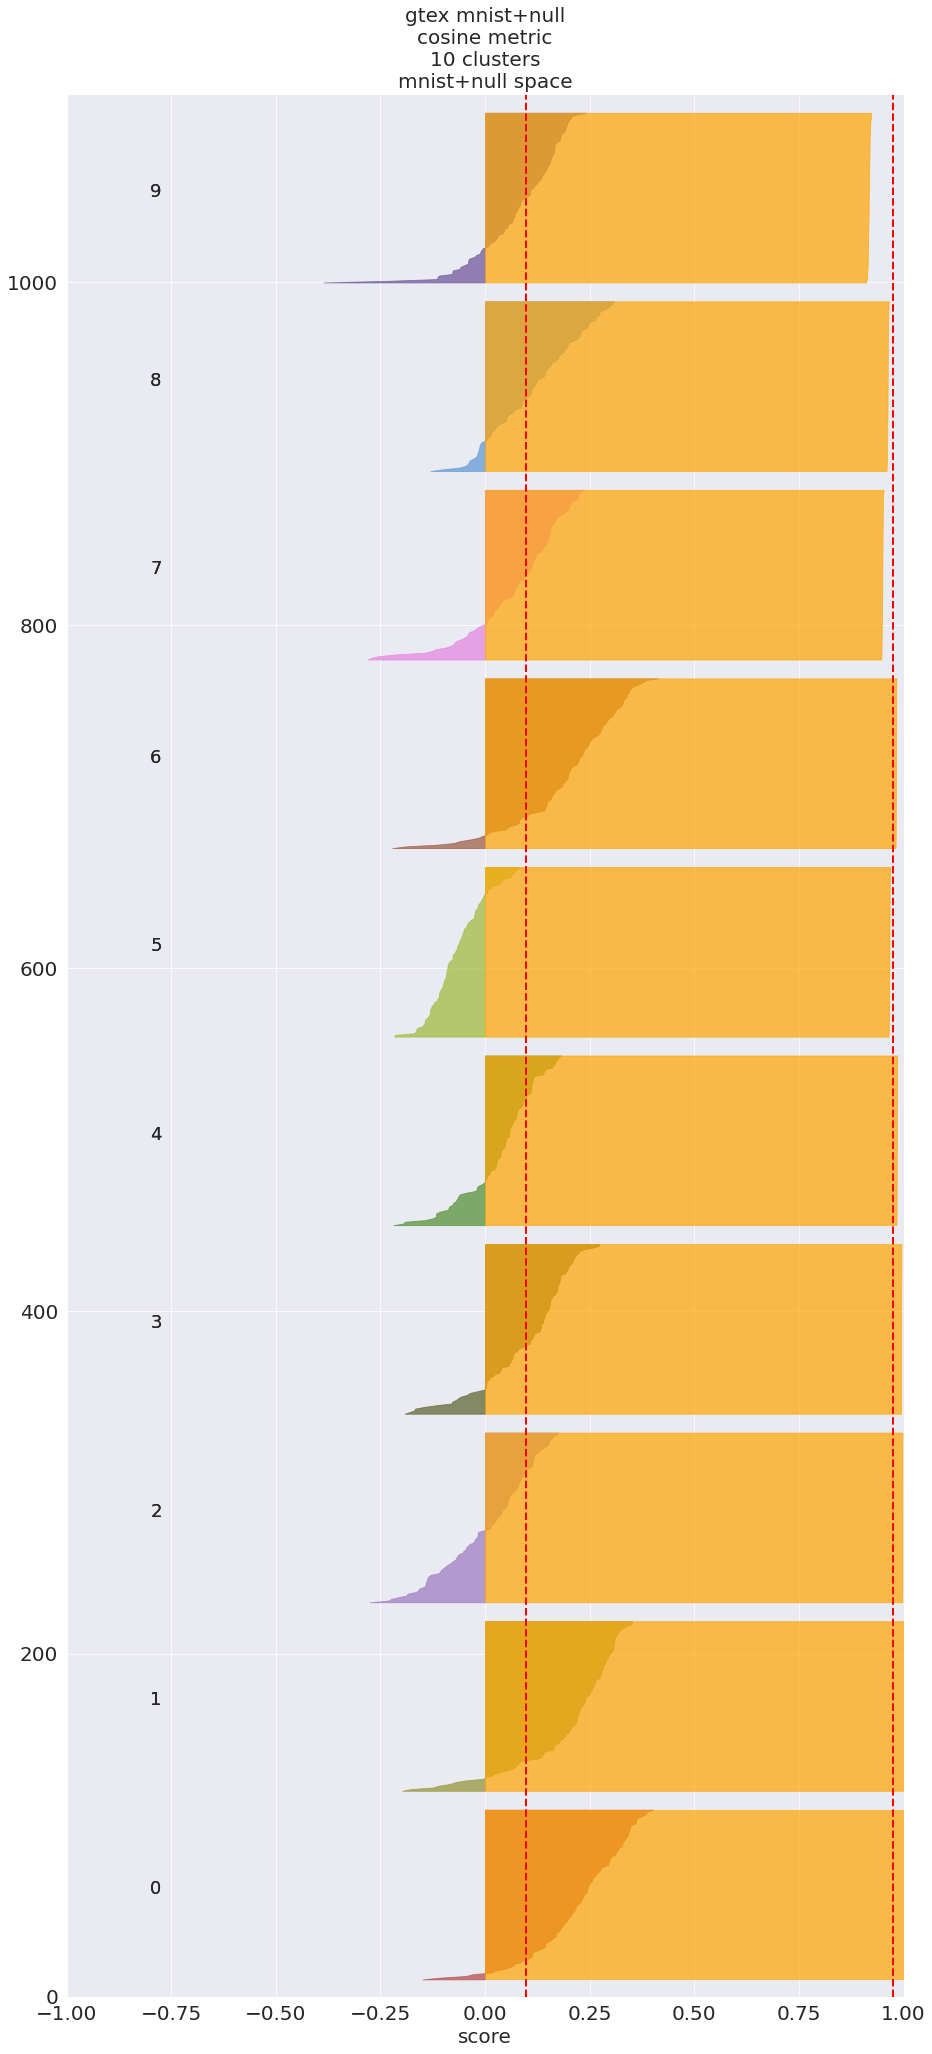

In [60]:
figs[1]